# Mnist Fashion With Tensorflow 2.0

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.fashion_mnist

In [6]:
type(mnist)

module

In [7]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [8]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
np.max(x_train)

255

In [12]:
np.mean(x_train)

72.94035223214286

## Labels of training images

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

class_names = ['t-shirt','trouser','pullover','dress','coar','sandal','shirt', 'sneaker', 'bag', 'ankle boot']

## Data Exploration

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

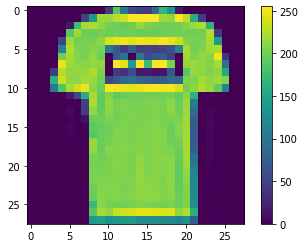

In [20]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
x_train=x_train/255.0

In [24]:
x_test=x_test/255.0

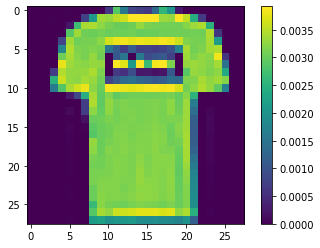

In [25]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

## Model with TF 2.0

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [27]:
model = Sequential()
model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model compilation
 - loss function
 - optimizer
 - metrics

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training

In [33]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3473 - accuracy: 0.8764
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3446 - accuracy: 0.8774
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3419 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3400 - accuracy: 0.8782
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3379 - accuracy: 0.8794
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3351 - accuracy: 0.8800
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3324 - accuracy: 0.8809
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3310 - accuracy: 0.8813
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3290 - accuracy: 0.8832
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.326

In [34]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 63.2753 - accuracy: 0.7612


In [59]:
from sklearn.metrics import accuracy_score

In [60]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [61]:
accuracy_score(y_test,y_pred)

0.7612

## Inference

In [63]:
pred = model.predict(x_test)
print(pred)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [66]:
pred[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

sneaker


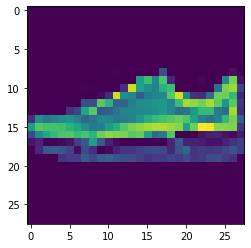

In [74]:
plt.imshow(x_test[9])
print(class_names[np.argmax(pred[9])])

## Saving the Model

In [65]:
model.save("mnist_fashion.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_fashion.model/assets
